In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

In [2]:
df = pd.read_csv('Distance.csv')
df

,Taipei,Hsinchu,Taichung,Tainan,Kaohsiung,Hualien,Taitung
0,0,54,138,267,289,172,215
1,54,0,88,223,247,149,187
2,138,88,0,136,161,103,125
3,267,223,136,0,26,128,98
4,289,247,161,26,0,141,105
5,172,149,103,128,141,0,44
6,215,187,125,98,105,44,0


In [3]:
a = np.array(df)
print(a)

[[  0  54 138 267 289 172 215]
 [ 54   0  88 223 247 149 187]
 [138  88   0 136 161 103 125]
 [267 223 136   0  26 128  98]
 [289 247 161  26   0 141 105]
 [172 149 103 128 141   0  44]
 [215 187 125  98 105  44   0]]


In [4]:
Min_Max=MinMaxScaler()
x=pd.DataFrame(Min_Max.fit_transform(a))
dis_matrix=pairwise_distances(x,metric='euclidean')

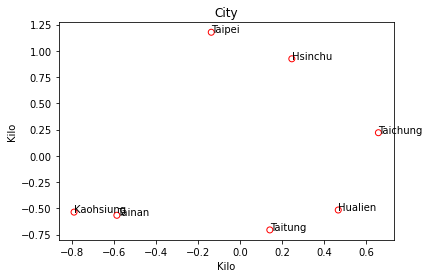

In [5]:
Modeel=MDS(n_components=2,dissimilarity="precomputed")
mds_fit=Modeel.fit(dis_matrix)
mds_coords=Modeel.fit_transform(dis_matrix)
city_names=['Taipei','Hsinchu','Taichung','Tainan', 'Kaohsiung', 'Hualien', 'Taitung']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],facecolors = 'none', edgecolors = 'r')  
labels = city_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('Kilo')
plt.ylabel('Kilo')
plt.title('City')    
plt.show()